In [87]:
import os

train_set_dir = "train_set/"
val_set_dir = "val_set/"
test_set_dir = "test_set/"

print(len(os.listdir(train_set_dir)))
print(len(os.listdir(test_set_dir)))
print(len(os.listdir(test_set_dir)))

8251
1768
1768


In [88]:
cd /data-output/Data/

/data-output/Data


In [89]:
import os

bird_dir = "/data-output/Data"
x_train_path = os.path.join(bird_dir,"train_set")
x_test_path = os.path.join(bird_dir,"test_set")
x_valid_path = os.path.join(bird_dir,"val_set")

y_train_path = os.path.join(bird_dir,"train_pname_to_index.csv")
y_valid_path = os.path.join(bird_dir,"val_pname_to_index.csv")

In [90]:
import pandas as pd

y_train = pd.read_csv(y_train_path,skiprows=0)
y_valid = pd.read_csv(y_valid_path,skiprows=0)

In [91]:
y_train.head()

,img_path,label
0,163.Cape_May_Warbler_1.jpg,163
1,141.Artic_Tern_2.jpg,141
2,183.Northern_Waterthrush_3.jpg,183
3,068.Ruby_throated_Hummingbird_4.jpg,68
4,128.Seaside_Sparrow_5.jpg,128


In [92]:
y_valid.head()

,img_path,label
0,003.Sooty_Albatross_1.jpg,3
1,074.Florida_Jay_2.jpg,74
2,108.White_necked_Raven_3.jpg,108
3,024.Red_faced_Cormorant_4.jpg,24
4,003.Sooty_Albatross_5.jpg,3


In [93]:
x_train_img_path = y_train["img_path"]
y_train = y_train["label"] - 1
x_valid_img_path = y_valid["img_path"]
y_valid = y_valid["label"] -1

print(x_train_img_path[:5])
print(y_train[:5])

print(x_valid_img_path[:5])
print(y_valid[:5])

0             163.Cape_May_Warbler_1.jpg
1                   141.Artic_Tern_2.jpg
2         183.Northern_Waterthrush_3.jpg
3    068.Ruby_throated_Hummingbird_4.jpg
4              128.Seaside_Sparrow_5.jpg
Name: img_path, dtype: object
0    162
1    140
2    182
3     67
4    127
Name: label, dtype: int64
0        003.Sooty_Albatross_1.jpg
1            074.Florida_Jay_2.jpg
2     108.White_necked_Raven_3.jpg
3    024.Red_faced_Cormorant_4.jpg
4        003.Sooty_Albatross_5.jpg
Name: img_path, dtype: object
0      2
1     73
2    107
3     23
4      2
Name: label, dtype: int64


In [94]:
# 定义读取图片函数
import cv2
import numpy as np

def get_img(file_path,img_rows,img_cols):
  
    img = cv2.imread(file_path)
    img = cv2.resize(img,(img_rows,img_cols))
    if img.shape[2] == 1:
      img = np.dstack([img,img,img])
    else:
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    
    return img

In [95]:
# 加载训练集
x_train = []
for img_name in x_train_img_path:
    img = get_img(os.path.join(x_train_path,img_name),224,224)
    x_train.append(img)

x_train = np.array(x_train,np.float32)

In [96]:
# 加载验证集
x_valid = []
for img_name in x_valid_img_path:
    img = get_img(os.path.join(x_valid_path,img_name),224,224)
    x_valid.append(img)

x_valid = np.array(x_valid,np.float32)

In [97]:
# 加载预测集
import re

x_test_img_path = os.listdir(x_test_path)
x_test_img_path = sorted(x_test_img_path,key = lambda i:int(re.match(r"(\d+)",i).group()))

print(x_test_img_path)

x_test = []
for img_name in x_test_img_path:
    img = get_img(os.path.join(x_test_path,img_name),224,224)
    x_test.append(img)

x_test = np.array(x_test,np.float32)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg', '100.jpg', '101.jp

In [98]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)

(8251, 224, 224, 3)
(8251,)
(1768, 224, 224, 3)
(1768,)
(1768, 224, 224, 3)


162


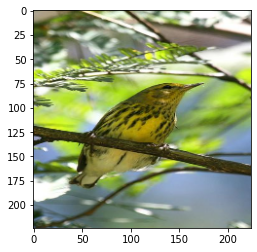

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0]/255)
print(y_train[0])

In [100]:
X_train = np.concatenate((x_train,x_valid),axis=0)
Y_train = np.concatenate((y_train,y_valid),axis=0)

print(X_train.shape)
print(Y_train.shape)


print(x_test.shape)

(10019, 224, 224, 3)
(10019,)
(1768, 224, 224, 3)


In [101]:
sum = np.unique(y_train)
n_classes = len(sum)

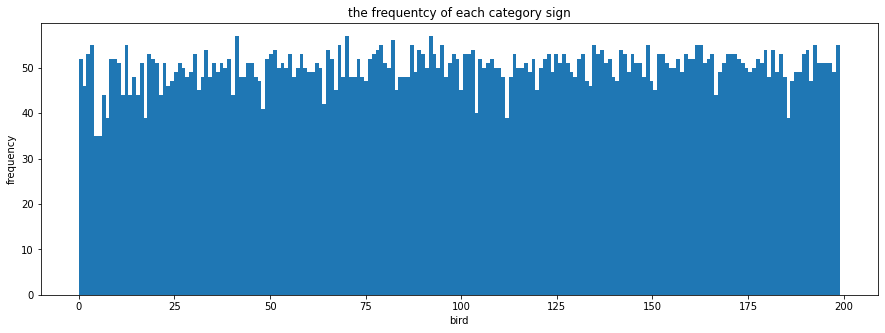

In [102]:
# 直方图来显示图像训练集的各个类别的分别情况
def plot_y_train_hist():
  fig = plt.figure(figsize=(15,5))
  ax = fig.add_subplot(1,1,1)
  hist = ax.hist(Y_train,bins=n_classes)
  ax.set_title("the frequentcy of each category sign")
  ax.set_xlabel("bird")
  ax.set_ylabel("frequency")
  plt.show()
  return hist

hist = plot_y_train_hist()

In [103]:
# 对标签数据进行one-hot编码

from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)

Shape after one-hot encoding: (10019, 200)


In [104]:
# 划分数据集
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(X_train,Y_train,test_size=0.3,random_state=2019)



print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)

(7013, 224, 224, 3)
(7013, 200)
(3006, 224, 224, 3)
(3006, 200)
(1768, 224, 224, 3)


In [105]:
# 导入开发需要的库
from keras import optimizers, Input
from keras.applications import  imagenet_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.applications import *

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [106]:

# 绘制训练过程中的 loss 和 acc 变化曲线
import matplotlib.pyplot as plt
%matplotlib inline

def history_plot(history_fit):
    plt.figure(figsize=(12,6))
    
    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(history_fit.history["acc"])
    plt.plot(history_fit.history["val_acc"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper left")
    
    # summarize history for loss
    plt.subplot(122)
    plt.plot(history_fit.history["loss"])
    plt.plot(history_fit.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    
    plt.show()
    plt.show()

In [107]:
# fine-tune 模型
def fine_tune_model(model, optimizer, batch_size, epochs, freeze_num):
    '''
    discription: 对指定预训练模型进行fine-tune，并保存为.hdf5格式
    
    MODEL：传入的模型，VGG16， ResNet50, ...

    optimizer: fine-tune all layers 的优化器, first part默认用adadelta
    batch_size: 每一批的尺寸，建议32/64/128
    epochs: fine-tune all layers的代数
    freeze_num: first part冻结卷积层的数量
    '''

    # datagen = ImageDataGenerator(
    #     rescale=1.255,
    #     # shear_range=0.2,
    #     # zoom_range=0.2,
    #     # horizontal_flip=True,
    #     # vertical_flip=True,
    #     # fill_mode="nearest"
    #   )
    
    # datagen.fit(X_train)
    
    
    # first: 仅训练全连接层（权重随机初始化的）
    # 冻结所有卷积层
    
    for layer in model.layers[:freeze_num]:
        layer.trainable = False
    
    model.compile(optimizer=optimizer, 
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    # model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
    #                     steps_per_epoch=len(x_train)/32,
    #                     epochs=3,
    #                     shuffle=True,
    #                     verbose=1,
    #                     datagen.flow(x_valid, y_valid))
    model.fit(x_train,
         y_train,
         batch_size=batch_size,
         epochs=3,
         shuffle=True,
         verbose=1,
         validation_data=(x_valid,y_valid)
        )
    print('Finish step_1')
    
    
    # second: fine-tune all layers
    for layer in model.layers[freeze_num:]:
        layer.trainable = True
    
    rc = ReduceLROnPlateau(monitor="val_loss",
                factor=0.2,
                patience=3,
                verbose=1,
                mode='min')

    model_name = model.name  + ".hdf5"
    mc = ModelCheckpoint(model_name, 
               monitor="val_loss", 
               save_best_only=True,
               verbose=1,
               mode='min')
    el = EarlyStopping(monitor="val_loss",
              min_delta=0,
              patience=5,
              verbose=1,
              restore_best_weights=True)
    
    model.compile(optimizer=optimizer, 
           loss='categorical_crossentropy', 
           metrics=["accuracy"])

    # history_fit = model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
    #                                  steps_per_epoch=len(x_train)/32,
    #                                  epochs=epochs,
    #                                  shuffle=True,
    #                                  verbose=1,
    #                                  callbacks=[mc,rc,el],
    #                                  datagen.flow(x_valid, y_valid))
    history_fit = model.fit(x_train,
                 y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 shuffle=True,
                 verbose=1,
                 validation_data=(x_valid,y_valid),
                 callbacks=[mc,rc,el])
    
    print('Finish fine-tune')
    return history_fit

In [110]:
# 定义双线性VGG16模型

from keras import backend as K

def batch_dot(cnn_ab):
    return K.batch_dot(cnn_ab[0], cnn_ab[1], axes=[1, 1])

def sign_sqrt(x):
    return K.sign(x) * K.sqrt(K.abs(x) + 1e-10)

def l2_norm(x):
    return K.l2_normalize(x, axis=-1)
 
 
def  bilinear_vgg16(img_rows,img_cols):
    input_tensor = Input(shape=(img_rows,img_cols,3))
    input_tensor = Lambda(imagenet_utils.preprocess_input)(input_tensor)

    model_vgg16 = VGG16(include_top=False, weights="imagenet",
                        input_tensor=input_tensor,pooling="avg")
    
    cnn_out_a = model_vgg16.layers[-2].output
    cnn_out_shape = model_vgg16.layers[-2].output_shape  #? 7 7 128
    cnn_out_a = Reshape([cnn_out_shape[1]*cnn_out_shape[2],
                         cnn_out_shape[-1]])(cnn_out_a) #? 49, 128

    cnn_out_b = cnn_out_a

    cnn_out_dot = Lambda(batch_dot)([cnn_out_a, cnn_out_b]) # ? 49,128
    cnn_out_dot = Reshape([cnn_out_shape[-1]*cnn_out_shape[-1]])(cnn_out_dot) #? 128*128
 
    sign_sqrt_out = Lambda(sign_sqrt)(cnn_out_dot)
    l2_norm_out = Lambda(l2_norm)(sign_sqrt_out)
    
    fc1 = Dense(1024,activation="relu",name="fc1")(l2_norm_out)
    dropout = Dropout(0.5)(fc1)
    output = Dense(n_classes, activation="softmax",name="output")(dropout)
    bvgg16_model = Model(inputs=model_vgg16.input, outputs=output,name="bvgg16")

    return bvgg16_model

In [111]:
# 创建双线性VGG16模型
img_rows,img_cols = 224,224
bvgg16_model = bilinear_vgg16(img_rows,img_cols)

In [112]:
for i,layer in enumerate(bvgg16_model.layers):
  print(i,layer.name)

0 input_1
1 lambda
2 block1_conv1
3 block1_conv2
4 block1_pool
5 block2_conv1
6 block2_conv2
7 block2_pool
8 block3_conv1
9 block3_conv2
10 block3_conv3
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_pool
16 block5_conv1
17 block5_conv2
18 block5_conv3
19 block5_pool
20 reshape
21 lambda_1
22 reshape_1
23 lambda_2
24 lambda_3
25 fc1
26 dropout
27 output


In [113]:
bvgg16_model.summary()

Model: "bvgg16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        lambda[0][0]                     
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
_____________________________________________________________________________________________

In [118]:

# 导入Efficient模块
from efficientnet.keras import EfficientNetB3
import keras.backend as K

In [119]:
# 定义一个EfficientNet模型
def efficient_model(img_rows,img_cols):
  K.clear_session()
  x = Input(shape=(img_rows,img_cols,3))
  x = Lambda(imagenet_utils.preprocess_input)(x)
  
  base_model = EfficientNetB3(input_tensor=x,weights="imagenet",include_top=False,pooling="avg")
  x = base_model.output
  x = Dense(1024,activation="relu",name="fc1")(x)
  x = Dropout(0.5)(x)
  predictions = Dense(n_classes,activation="softmax",name="predictions")(x)

  eB_model = Model(inputs=base_model.input,outputs=predictions,name="eB3")

  return eB_model

In [120]:
# 创建Efficient模型
img_rows,img_cols=224,224
eB_model = efficient_model(img_rows,img_cols)

44113920/44107200 [==============================] - 1772s 40us/step


In [121]:
for i,layer in enumerate(eB_model.layers):
  print(i,layer.name)

0 input_1
1 lambda
2 stem_conv
3 stem_bn
4 stem_activation
5 block1a_dwconv
6 block1a_bn
7 block1a_activation
8 block1a_se_squeeze
9 block1a_se_reshape
10 block1a_se_reduce
11 block1a_se_expand
12 block1a_se_excite
13 block1a_project_conv
14 block1a_project_bn
15 block1b_dwconv
16 block1b_bn
17 block1b_activation
18 block1b_se_squeeze
19 block1b_se_reshape
20 block1b_se_reduce
21 block1b_se_expand
22 block1b_se_excite
23 block1b_project_conv
24 block1b_project_bn
25 block1b_drop
26 block1b_add
27 block2a_expand_conv
28 block2a_expand_bn
29 block2a_expand_activation
30 block2a_dwconv
31 block2a_bn
32 block2a_activation
33 block2a_se_squeeze
34 block2a_se_reshape
35 block2a_se_reduce
36 block2a_se_expand
37 block2a_se_excite
38 block2a_project_conv
39 block2a_project_bn
40 block2b_expand_conv
41 block2b_expand_bn
42 block2b_expand_activation
43 block2b_dwconv
44 block2b_bn
45 block2b_activation
46 block2b_se_squeeze
47 block2b_se_reshape
48 block2b_se_reduce
49 block2b_se_expand
50 block

In [122]:
eB_model.summary()

Model: "eB3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 40) 1080        lambda[0][0]                     
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 40) 160         stem_conv[0][0]                  
________________________________________________________________________________________________

In [ ]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 15
freeze_num = 379
eB_model_history  = fine_tune_model(eB_model,optimizer,batch_size,epochs,freeze_num)

Epoch 1/3
220/220 [==============================] - 818s 4s/step - loss: 135.7933 - accuracy: 0.0036 - val_loss: 8.9004 - val_accuracy: 0.0027
Epoch 2/3
220/220 [==============================] - 864s 4s/step - loss: 21.4234 - accuracy: 0.0054 - val_loss: 7.0271 - val_accuracy: 0.0033
Epoch 3/3
220/220 [==============================] - 871s 4s/step - loss: 12.9168 - accuracy: 0.0051 - val_loss: 6.0221 - val_accuracy: 0.0033
Finish step_1
Epoch 1/15
220/220 [==============================] - 881s 4s/step - loss: 12.0485 - accuracy: 0.0039 - val_loss: 5.7519 - val_accuracy: 0.0037

Epoch 00001: val_loss improved from inf to 5.75194, saving model to eB3.hdf5
Epoch 2/15
220/220 [==============================] - 877s 4s/step - loss: 8.2901 - accuracy: 0.0085 - val_loss: 5.7004 - val_accuracy: 0.0037

Epoch 00002: val_loss improved from 5.75194 to 5.70041, saving model to eB3.hdf5
Epoch 3/15
220/220 [==============================] - 885s 4s/step - loss: 7.3169 - accuracy: 0.0061 - val_lo

In [ ]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 6
freeze_num = 26
bvgg16_history = fine_tune_model(bvgg16_model,optimizer,batch_size,epochs,freeze_num)

In [2]:
history_plot(bvgg16_history)

NameError: name 'bvgg16_history' is not defined

In [ ]:
# 后面是测试部分

In [5]:
cd /data-output

/data-output


In [6]:
ls

Data/  Data.rar  rar/  rarlinux-x64-6.0.0.tar.gz


In [9]:
cd Data

[Errno 2] No such file or directory: 'Data'
/data-output/Data


In [10]:
ls

bvgg16.hdf5         test_set/                 val_pname_to_index.csv
bvgg16.hdf5.tar.gz  train_pname_to_index.csv  val_set/
classes.txt         train_set/                数据集使用说明.txt


In [35]:
from keras.models import load_model
from keras.models import Model
import keras
import numpy as np

In [34]:
filepath = "bvgg16.hdf5"
model = load_model(filepath)
model.summary()
for i in model.layers:
    print(i.name)

Model: "bvgg16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        lambda_4[0][0]                   
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
_____________________________________________________________________________________________

In [68]:
imgpath = "test_set/1231.jpg"
test_img = keras.preprocessing.image.load_img(imgpath,target_size=(224,224,3))
test_img = keras.preprocessing.image.img_to_array(test_img)
test_img = test_img
test_img = np.expand_dims(test_img, 0)
pred = model.predict(test_img)
result = max(pred[0])
count = pred.argmax()
print(result)
print(count)

0.075491086
192
